<a href="https://colab.research.google.com/github/NizarMohd/RunOrWalk/blob/main/3-ClassMLPWithK-Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv('SHIELD.csv') #Replace it with your path where the data file is stored
df.head()
df.describe()





,min ax,min ay,min az,min gx,min gy,min gz,max ax,max ay,max az,max gx,max gy,max gz,mean ax,mean ay,mean az,mean gx,mean gy,mean gz,label
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.00000,1032.000000,1032.000000,1032.0
mean,-126.993217,-25.310078,-126.891473,-4.885659,-72.532946,-119.194767,126.815891,126.851744,93.858527,-4.61531,121.072674,88.699612,-33.156008,47.016473,-13.859496,-4.61531,4.593992,1.805233,1.0
std,0.217900,17.589532,1.974583,0.671223,24.113876,18.547076,2.542561,2.240254,26.851630,0.68110,15.230195,25.780256,9.843779,13.212679,8.165043,0.68110,5.737457,7.187246,0.0
min,-127.000000,-94.000000,-127.000000,-8.000000,-127.000000,-127.000000,76.000000,87.000000,15.000000,-7.00000,39.000000,19.000000,-52.000000,-23.000000,-36.000000,-7.00000,-17.000000,-32.000000,1.0
25%,-127.000000,-37.000000,-127.000000,-5.000000,-85.000000,-127.000000,127.000000,127.000000,74.000000,-5.00000,127.000000,69.000000,-38.000000,43.000000,-19.000000,-5.00000,1.000000,-2.000000,1.0
50%,-127.000000,-24.000000,-127.000000,-5.000000,-69.000000,-127.000000,127.000000,127.000000,94.000000,-5.00000,127.000000,86.000000,-34.000000,49.000000,-14.000000,-5.00000,4.000000,1.000000,1.0
75%,-127.000000,-14.000000,-127.000000,-5.000000,-57.000000,-127.000000,127.000000,127.000000,121.000000,-4.00000,127.000000,111.000000,-31.000000,54.000000,-9.000000,-4.00000,8.000000,6.000000,1.0
max,-120.000000,42.000000,-70.000000,-3.000000,-17.000000,-30.000000,127.000000,127.000000,127.000000,-3.00000,127.000000,127.000000,29.000000,74.000000,38.000000,-3.00000,23.000000,35.000000,1.0


In [2]:

descriptors = df.describe()

shield_attr_min = []
shield_attr_max = []

for attr in descriptors:
      shield_attr_min.append(descriptors[attr]['mean'] - descriptors[attr]['std'])
      shield_attr_max.append(descriptors[attr]['mean'] + descriptors[attr]['std'])
     
print(shield_attr_min)
print(shield_attr_max)


[-127.2111175364912, -42.89960947800705, -128.86605552894187, -5.556882410675558, -96.64682203033422, -137.74184366991574, 124.27333050500327, 124.61149061934293, 67.00689712706944, -5.296410132534782, 105.8424798755847, 62.91935619923581, -42.99978666405049, 33.80379342309561, -22.024538767847908, -5.296410132534782, -1.1434646781851212, -5.382013106010531, 1.0]
[-126.77531657203593, -7.72054556075264, -124.91689020749223, -4.2144354187818065, -48.41906944253401, -100.64769121380519, 129.35845244073317, 129.0919977527501, 120.71015713649646, -3.9342100225039784, 136.3028689616246, 114.47986860696574, -23.312228839825483, 60.2291523133385, -5.69445348021411, -3.9342100225039784, 10.331449174309153, 8.9924782222896, 1.0]


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df=pd.read_csv('GRENADE.csv') #Replace it with your path where the data file is stored
df.head()
df.describe()

,min ax,min ay,min az,min gx,min gy,min gz,max ax,max ay,max az,max gx,max gy,max gz,mean ax,mean ay,mean az,mean gx,mean gy,mean gz,label
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.0,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.0
mean,-126.686654,40.458414,-123.261122,-4.970019,-126.326886,-118.193424,66.926499,127.0,118.357834,-4.757253,125.378143,112.184720,-32.341393,82.842360,6.751451,-4.757253,-15.780464,-2.776596,2.0
std,3.154688,16.124057,16.036608,0.480068,6.408905,19.199904,46.562810,0.0,17.789280,0.497886,9.963396,25.914292,14.884729,6.760264,16.030438,0.497886,8.276862,9.154022,0.0
min,-127.000000,-48.000000,-127.000000,-6.000000,-127.000000,-127.000000,-35.000000,127.0,33.000000,-6.000000,8.000000,12.000000,-66.000000,35.000000,-43.000000,-6.000000,-49.000000,-36.000000,2.0
25%,-127.000000,35.000000,-127.000000,-5.000000,-127.000000,-127.000000,27.250000,127.0,121.000000,-5.000000,127.000000,104.000000,-42.000000,80.000000,-1.000000,-5.000000,-21.000000,-9.000000,2.0
50%,-127.000000,46.000000,-127.000000,-5.000000,-127.000000,-127.000000,64.000000,127.0,127.000000,-5.000000,127.000000,127.000000,-34.000000,84.000000,7.000000,-5.000000,-16.000000,-2.000000,2.0
75%,-127.000000,51.000000,-127.000000,-5.000000,-127.000000,-124.000000,123.000000,127.0,127.000000,-4.000000,127.000000,127.000000,-25.000000,87.000000,15.750000,-4.000000,-11.000000,3.000000,2.0
max,-69.000000,61.000000,8.000000,-4.000000,-30.000000,-18.000000,127.000000,127.0,127.000000,-3.000000,127.000000,127.000000,34.000000,99.000000,59.000000,-3.000000,17.000000,36.000000,2.0


In [4]:
descriptors = df.describe()

grenade_attr_min = []
grenade_attr_max = []

for attr in descriptors:
      grenade_attr_min.append(descriptors[attr]['mean'] - descriptors[attr]['std'])
      grenade_attr_max.append(descriptors[attr]['mean'] + descriptors[attr]['std'])
     
print(grenade_attr_min)
print(grenade_attr_max)

[-129.841342014834, 24.33435735898202, -139.29772981703084, -5.4500873026313625, -132.73579127164302, -137.3933276814297, 20.36368908743337, 127.0, 100.56855396336587, -5.255139137147323, 115.41474710398101, 86.27042713939942, -47.22612200099857, 76.08209600388648, -9.278987541942946, -5.255139137147323, -24.057326692623953, -11.930617899126766, 2.0]
[-123.5319655286863, 56.58247049401605, -107.22451389670223, -4.489951382088173, -119.91798048851172, -98.99351951392813, 113.48930897833064, 127.0, 136.14711334804613, -4.259367632678597, 135.34153916294355, 138.09901193216731, -17.45666329880801, 89.60262353189688, 22.781888895908132, -4.259367632678597, -7.503601740644909, 6.377426409765064, 2.0]


In [5]:
df=pd.read_csv('features_test1.csv') #Replace it with your path where the data file is stored
df.head()
df.describe()


,min ax,min ay,min az,min gx,min gy,min gz,max ax,max ay,max az,max gx,max gy,max gz,mean ax,mean ay,mean az,mean gx,mean gy,mean gz,label
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.00000,2714.000000,2714.000000,2714.000000,2714.000000
mean,-111.802874,-0.241341,-96.627856,-4.935520,-88.857775,-104.844510,81.929256,109.484156,100.564112,-4.686809,106.299926,89.575166,-27.229919,51.905306,6.38283,-4.686809,-4.834193,-0.473102,1.142225
std,35.835782,39.126167,59.398130,0.981907,38.026709,35.983422,52.048506,37.905045,28.105584,0.962203,37.960325,37.234561,19.181141,31.087410,26.93193,0.962203,11.766298,8.282706,0.774430
min,-127.000000,-127.000000,-127.000000,-8.000000,-127.000000,-127.000000,-52.000000,-47.000000,-16.000000,-8.000000,-23.000000,-1.000000,-101.000000,-61.000000,-66.00000,-8.000000,-49.000000,-44.000000,0.000000
25%,-127.000000,-28.000000,-127.000000,-5.000000,-127.000000,-127.000000,32.000000,127.000000,78.000000,-5.000000,102.000000,63.000000,-39.000000,35.000000,-14.00000,-5.000000,-14.000000,-5.000000,1.000000
50%,-127.000000,-6.500000,-127.000000,-5.000000,-89.000000,-127.000000,123.000000,127.000000,107.500000,-5.000000,127.000000,95.000000,-32.000000,53.000000,0.00000,-5.000000,-2.000000,0.000000,1.000000
75%,-127.000000,41.000000,-127.000000,-5.000000,-59.000000,-90.000000,127.000000,127.000000,127.000000,-4.000000,127.000000,127.000000,-23.000000,82.000000,18.00000,-4.000000,4.000000,4.000000,2.000000
max,60.000000,61.000000,66.000000,-1.000000,-2.000000,2.000000,127.000000,127.000000,127.000000,-1.000000,127.000000,127.000000,64.000000,108.000000,73.00000,-1.000000,33.000000,42.000000,2.000000


Text(0.5, 1.0, 'Correlation between different features')

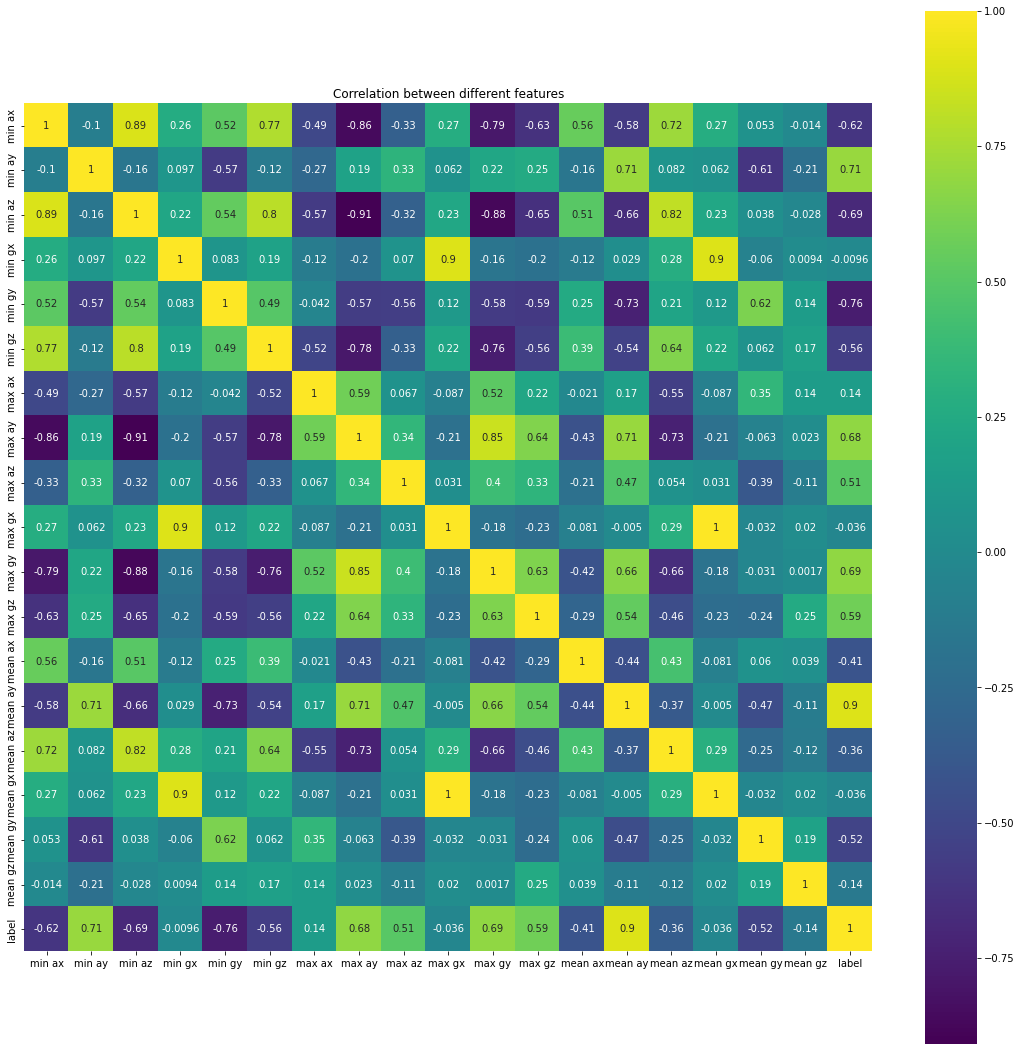

In [6]:
correlation = df.corr()
plt.figure(figsize=(19,19))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different features')

### **1. Preparation**



**Check Python version.**

In [7]:
!python -V

Python 3.7.12


**Check Cuda version.**

In [8]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


**Install dependencies.**

In [9]:
pip install torch torchvision

In [10]:
pip install opencv-python

**Check GPU usage.**

In [11]:
# Check if runtime uses GPU
import torch

gpu_name = torch.cuda.get_device_name(0)

print("Using GPU", gpu_name)

Using GPU Tesla P100-PCIE-16GB


Load Dataset

In [12]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import Dataset
from torch.utils.data import Sampler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Dropout
from torch.optim import Adam, SGD
import tensorflow as tf
from torchvision import transforms
from torchvision.transforms import *
from sklearn.utils import shuffle

datasets = pd.read_csv('features_test1.csv')
datasets.dropna()
datasets = shuffle(datasets)

# train_set, test_set = train_test_split(datasets, test_size = 0.1)

# test_set, val_set = train_test_split(test_set, test_size = 0.5)
# test_set.dropna()
# val_set.dropna()

k_fold = 10
seg = round(1/k_fold * len(datasets))

class MyDataset(Dataset):
    global shield_attr_max, shield_attr_min, grenade_attr_max, grenade_attr_min
    def __init__(self,k,is_train=True):

      # # compute k_fold segments
      val_l = int(seg * k)
      val_r = int(val_l + seg)

      val_set = datasets.iloc[val_l:val_r]
      training_set = datasets.drop(val_set.index)
      if is_train:
        self.data = training_set
      else:
        self.data = val_set
      print(f'loaded data with dataset size {len(self)}')
      # print("Val left index: " + str(val_l))
      # print("Val right index: " + str(val_r))
 
      
    def __getitem__(self, idx):
        classes = 3
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        image = item[0:18]
        label = item[18]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels

    def __len__(self):
        return len(self.data)


**MLP** Model

In [13]:
import torch.nn as nn
import torch.nn.functional as F
class Model(nn.Module):
  
  def __init__(self):
    super(Model, self).__init__()
    n_input = 18
    n_h1 = 74
    n_h2 = 37
    n_h3 = 10
    n_output = 3

    self.h1 = nn.Linear(n_input, n_h1)
    self.h2 = nn.Linear(n_h1, n_h2)
    self.h3 = nn.Linear(n_h2, n_h3)
    self.output = nn.Linear(n_h3, n_output)

    print(self)
  
  def forward(self, x):
    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = F.relu(self.h3(x))
    x = self.output(x)
    return x


# class Net(nn.Module):   
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(24,12)    # input layer
#         self.fc2 = nn.Linear(12, 6)            # hidden layer
#         self.out = nn.Linear(6, 2)
        

#     # Defining the forward pass    
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.out(x)
#         return x


Train Model

In [14]:
from torch import optim
from sklearn.model_selection import StratifiedKFold

def accuracy_score(outputs, targets):
  sum = 0
  batch_size = targets.size(0)
  
  for i in range(batch_size):
    index_O = outputs.cpu().data.numpy()[i].argmax()
    index_T = targets.cpu().data.numpy()[i].argmax()

    if index_O == index_T:
      sum = sum + 1
  return sum / batch_size

def train():
  batch_size = 64
  num_epochs = 100
  num_workers = 2

  model = Model()
  model = model.cuda().float()
  
  loss_fn = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(),lr = 0.0001, momentum= 0.9, nesterov = True)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.3, verbose=True)

  train_score= []
  test_score = []
  for k in range(k_fold):
 
        train_set = MyDataset(k,is_train=True)
        validation_set = MyDataset(k, is_train=False)

        train_loader = torch.utils.data.DataLoader(
              train_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=True)
        validation_loader = torch.utils.data.DataLoader(
              validation_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=False)
        
        for epoch in range(num_epochs):
          train_loss, valid_loss = [], []
          train_acc , val_acc = [], []
          # train
          model.train()

          # #quantize model
          # model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
          # model = torch.quantization.prepare_qat(model, inplace=True)

          for i, (data, target) in enumerate(train_loader):
              data, target = data.cuda().float(), target.cuda().float()
              # clear gradients
              optimizer.zero_grad()

              # forward prop
              prediction = model(data)

              # loss calculation
              loss = loss_fn(prediction, target)

              #backward prop
              loss.backward()

              ## weight optimization
              optimizer.step()

              train_loss.append(loss.item())
              train_acc.append(accuracy_score(prediction, target))

              if i % 100 == 99:
                      print(f'training: iteration {i} / {len(train_loader)}, avg train loss = {np.mean(train_loss):.4f}, '
                            f'train accuracy {np.mean(train_acc):.4f}')
          
          # eval
          model.eval()
          for i, (data, target) in enumerate(validation_loader):
              data, target = data.cuda().float(), target.cuda().float()
              prediction = model(data)
              loss = loss_fn(prediction, target)
              valid_loss.append(loss.item())
              val_acc.append(accuracy_score(prediction, target))

              if i % 100 == 99:
                      print(f'validation: iteration {i} / {len(validation_loader)}, avg val loss = {np.mean(train_loss):.4f}, '
                            f'val accuracy {val_acc.avg:.4f}')

          # epoch summary
          print("Epoch:", epoch, "Train Loss:", np.mean(train_loss), "Train acc:", np.mean(train_acc), "Val Loss:", np.mean(valid_loss), "Val Acc:",  np.mean(val_acc))

          # lr scheduler
          scheduler.step(np.mean(valid_loss))

          # checkpoint
          if epoch % 2 == 10:
              torch.save(model.state_dict(), f'ckpt_e{epoch}.pth')
          if epoch == num_epochs-1:
              train_score.append(np.mean(train_acc))
              test_score.append(np.mean(val_acc))
                   
  torch.save(model.state_dict(), 'A0183398M-Model.pth')
  print("Train Score: " +str(np.mean(train_score)))
  print("Test Score: " + str(np.mean(test_score)))
  

if __name__ == "__main__":
    train()


Model(
  (h1): Linear(in_features=18, out_features=74, bias=True)
  (h2): Linear(in_features=74, out_features=37, bias=True)
  (h3): Linear(in_features=37, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=3, bias=True)
)
loaded data with dataset size 2443
loaded data with dataset size 271
Epoch: 0 Train Loss: 0.3116751320851155 Train acc: 0.6296255827505828 Val Loss: 0.20214755833148956 Val Acc: 0.750625
Epoch: 1 Train Loss: 0.2013200261653998 Train acc: 0.7225743006993007 Val Loss: 0.1734954982995987 Val Acc: 0.7841666666666667
Epoch: 2 Train Loss: 0.17840274136800033 Train acc: 0.7637674825174825 Val Loss: 0.1531626284122467 Val Acc: 0.8162499999999999
Epoch: 3 Train Loss: 0.16467528274426094 Train acc: 0.7894813519813519 Val Loss: 0.14075007438659667 Val Acc: 0.8577083333333334
Epoch: 4 Train Loss: 0.15218790945334312 Train acc: 0.8114437645687645 Val Loss: 0.1314553737640381 Val Acc: 0.8764583333333335
Epoch: 5 Train Loss: 0.14246481828964674 Train acc: 0

Test Accuracy

In [16]:
from torch.nn.modules.container import ModuleList
import torch
from torch import nn
# Change [your_python_file] to the actual file containing the definitons of the classes


def test():
    my_model = Model()
    my_model = my_model.cuda()
    my_model.eval()

    my_model.load_state_dict(torch.load('A0183398M-Model.pth'))
    
    for k in range(k_fold):
        test_set = MyDataset(k,is_train=False)
        batch_size = 64


        # mp.set_start_method('spawn', force=True)
        test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                          shuffle=False)

        # test accuracy
        test_acc = []
        for i, (image,label) in enumerate(test_loader):
            image, label = image.cuda().float(), label.cuda().float()
            with torch.no_grad():
                prediction = my_model(image)
                acc = accuracy_score(prediction, label)
                test_acc.append(acc)

            if i % 10 == 9:
                print(f'test: iteration {i} / {len(test_loader)}, '
                      f'test accuracy {np.mean(test_acc):.4f}')

        print(f'evaluation finished, val acc {np.mean(test_acc):.4f}')

if __name__ == "__main__":
    test()

Model(
  (h1): Linear(in_features=18, out_features=74, bias=True)
  (h2): Linear(in_features=74, out_features=37, bias=True)
  (h3): Linear(in_features=37, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=3, bias=True)
)
loaded data with dataset size 271
evaluation finished, val acc 0.9812
loaded data with dataset size 271
evaluation finished, val acc 0.9546
loaded data with dataset size 271
evaluation finished, val acc 0.9781
loaded data with dataset size 271
evaluation finished, val acc 0.9710
loaded data with dataset size 271
evaluation finished, val acc 0.9781
loaded data with dataset size 271
evaluation finished, val acc 0.9710
loaded data with dataset size 271
evaluation finished, val acc 0.9554
loaded data with dataset size 271
evaluation finished, val acc 0.9452
loaded data with dataset size 271
evaluation finished, val acc 0.9844
loaded data with dataset size 271
evaluation finished, val acc 0.9750


Extract weights and biases

In [18]:
from torch import nn
import torch
import torch.quantization.quantize_fx as quantize_fx
import copy
import csv

my_model = Model()
my_model = my_model.cuda()
my_model.eval()
my_model.load_state_dict(torch.load('A0183398M-Model.pth'))
f = open('weights.csv', 'w', encoding='UTF8', newline='')
writer = csv.writer(f)

w1 = []
w2 = []
w3 = []
w4 = []

b1 = []
b2 = []
b3 = []
b4 = []

n_input = 18
n_h1 = 74
n_h2 = 37
n_h3 = 10
n_output = 3
scale = 10**4
for param_tensor in my_model.state_dict():
    # get each layer, print layer size
    print(param_tensor, "\t", my_model.state_dict()[param_tensor].size())
    print("\n")
    print(param_tensor, "\t", my_model.state_dict()[param_tensor])
    print("\n")

    # prepare min,max of each layer
    r_max = 0
    r_min = 0
    layer = my_model.state_dict()[param_tensor]

    
    # if param_tensor == 'h1.weight' or param_tensor == 'h2.weight' or param_tensor == 'output.weight':
    #   # writer.writerow("weights")
    #   print("weights")
    #   #layer is 2D array
    #   for row in layer:
    #     if r_max < max(row.cpu().numpy()):
    #       r_max = max(row.cpu().numpy())      
    #     if r_min > min(row.cpu().numpy()):
    #       r_min = min(row.cpu().numpy())
    # else:
    #   # layer is 1D array
    #   # writer.writerow("bias")
    #   print("bias")
    #   r_max = max(layer.cpu().numpy())
    #   r_min = min(layer.cpu().numpy())

    # s = 2 / (r_max - r_min)
    # c = -1 - s * r_min
    out = []

    
    r = 0
  

    if param_tensor == 'h1.weight' or param_tensor == 'h2.weight'  or param_tensor == 'h3.weight' or param_tensor == 'output.weight':
      #layer is 2D array
      for row in layer:
        r = r + 1
        for item in row:
          y = item.item() * (scale)
          out.append(round(y))
          if param_tensor == 'h1.weight':
            w1.append(round(y))
          elif param_tensor == 'h2.weight':
            w2.append(round(y))
          elif param_tensor == 'h3.weight':
            w3.append(round(y))
          else:
            w4.append(round(y))
          

      
    else:
      # layer is 1D array
      for item in layer:
          r = r + 1
          y = item.item() * (scale)
          
          out.append(round(y))
          if param_tensor == 'h1.bias':
            b1.append(round(y))
          elif param_tensor == 'h2.bias':
            b2.append(round(y))
          elif param_tensor == 'h3.bias':
            b3.append(round(y))
          else:
            b4.append(round(y))

    print(r)
    print(out)
    
    print("\n")


#  compute accuracy of quantized weights


for k in range(k_fold):
        test_set = MyDataset(k,is_train=False)
        batch_size = 64


        # mp.set_start_method('spawn', force=True)
        test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                          shuffle=False)

        # test accuracy
        test_acc = []



        for m, (image,label) in enumerate(test_loader):
                
                acc = 0
                idx = 0
                preds = []
                for data in image:
                  z1 = []
                  z2 = []
                  z3 = []
                  z4 = []
                  # 24 attr, 64 data
                  # compute Z1 = W1x + b1
                  j = 0
                  z = 0
                  x = data.numpy()
                  for i in range(0, n_h1 * n_input):
                    z = w1[i] * x[i%n_input] + z
                    if i% n_input == n_input - 1:
                      z = z + b1[j]
                      j = j + 1
                      if z < 0:
                        z = 0
                      z1. append(round(z)/scale)
                      z = 0
                  

                  # compute z2 = w2 * z1 + b2
                  j = 0
                  z = 0
                  for i in range(0, n_h2 * n_h1):
                    z = w2[i] * z1[i%n_h1] + z
                    if i% n_h1 == n_h1 - 1:
                      z = z + b2[j]
                      j = j + 1
                      if z < 0:
                        z = 0
                      z2.append(round(z)/scale)
                      z = 0 
                  
                  j = 0
                  z = 0
                  for i in range(0, n_h3 * n_h2):
                    z = w3[i] * z2[i%n_h2] + z
                    if i% n_h2 == n_h2 - 1:
                      z = z + b3[j]
                      j = j + 1
                      if z < 0:
                        z = 0
                      z3.append(round(z)/scale)
                      z = 0 

                  j = 0
                  z = 0
                  for i in range(0, n_output * n_h3):
                    z = w4[i] * z3[i%n_h3] + z
                    if i% n_h3 == n_h3-1:
                      z = z + b4[j]
                      j = j + 1
                      if z < 0:
                        z = 0
                      z4.append(round(z))
                      z = 0 
                  
                
                  pred = np.argmax(np.asarray(z4))
                  preds.append(pred)

                sum = 0
                for i in range(label.size(0)):
                  i_o = preds[i]
                  i_t = np.argmax(label[i].numpy())
                  if i_o == i_t:
                    sum = sum + 1
                test_acc.append(sum/label.size(0))
                print(sum/label.size(0))

        print(np.mean(test_acc))  
  

Model(
  (h1): Linear(in_features=18, out_features=74, bias=True)
  (h2): Linear(in_features=74, out_features=37, bias=True)
  (h3): Linear(in_features=37, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=3, bias=True)
)
h1.weight 	 torch.Size([74, 18])


h1.weight 	 tensor([[-0.2348, -0.1275,  0.1186,  ..., -0.0019,  0.1884,  0.0105],
        [-0.0005,  0.2104, -0.0352,  ..., -0.1845,  0.2189,  0.0047],
        [ 0.2138,  0.2043,  0.0078,  ..., -0.0485, -0.1202, -0.1871],
        ...,
        [ 0.0679,  0.1072,  0.1410,  ..., -0.1799,  0.0601, -0.1946],
        [ 0.0466,  0.0889, -0.1656,  ...,  0.1659, -0.2037, -0.0484],
        [-0.1785,  0.0573,  0.1395,  ...,  0.1607,  0.0693,  0.0962]],
       device='cuda:0')


74
[-2348, -1275, 1186, -917, 1988, -1795, 225, 915, -20, -478, -337, -1361, 432, -996, -2174, -19, 1884, 105, -5, 2104, -352, -208, 1342, 126, 1373, -837, -537, 1317, 815, -2229, -1178, 312, -393, -1845, 2189, 47, 2138, 2043, 78, 1512, 102, -35

In [ ]:
"Real Time Testing"

In [19]:


class MyTestSet(Dataset):
    
    
    def __init__(self, in_data):
  
      self.data = in_data
      print(f'loaded data with dataset size {len(self)}')
 
      
    def __getitem__(self, idx):
        classes = 3
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        image = item[2:20]
        label = item[20]
        time = item[1]
        batch = item[0]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels, time, batch

    def __len__(self):
        return len(self.data)

pseudo_real_time_test = datasets = pd.read_csv('time_test.csv')
pseudo_real_time_test.dropna()

prtt = MyTestSet(pseudo_real_time_test)

test_loader = torch.utils.data.DataLoader(prtt, batch_size=1, shuffle=False)

for k, (image,label, time, batch) in enumerate(test_loader):
        
        acc = 0
        idx = 0
        preds = []
        for data in image:
          z1 = []
          z2 = []
          z3 = []
          z4 = []
          # 24 attr, 64 data
          # compute Z1 = W1x + b1
          j = 0
          z = 0
          x = data.numpy()
          for i in range(0, n_h1 * n_input):
            z = w1[i] * x[i%n_input] + z
            if i% n_input == n_input - 1:
              z = z + b1[j]
              j = j + 1
              if z < 0:
                z = 0
              z1. append(round(z/1000))
              z = 0
          

          # compute z2 = w2 * z1 + b2
          j = 0
          z = 0
          for i in range(0, n_h2 * n_h1):
            z = w2[i] * z1[i%n_h1] + z
            if i% n_h1 == n_h1 - 1:
              z = z + b2[j]
              j = j + 1
              if z < 0:
                z = 0
              z2.append(round(z/1000))
              z = 0 
          
          j = 0
          z = 0
          for i in range(0, n_h3 * n_h2):
            z = w3[i] * z2[i%n_h2] + z
            if i% n_h2 == n_h2 - 1:
              z = z + b3[j]
              j = j + 1
              if z < 0:
                z = 0
              z3.append(round(z/1000))
              z = 0 

          j = 0
          z = 0
          for i in range(0, n_output * n_h3):
            z = w4[i] * z3[i%n_h3] + z
            if i% n_h3 == n_h3-1:
              z = z + b4[j]
              j = j + 1
              if z < 0:
                z = 0
              z4.append(round(z))
              z = 0 
          
        
          pred = np.argmax(np.asarray(z4))
          actual = np.argmax(label.numpy())

          if pred == actual:
            print("Correct prediction at: " + str(time.item()/2000.0) + ", " + str(time.item()) + " for batch" + str(batch.item()))
    

          
      


loaded data with dataset size 112
Correct prediction at: 0.3235, 647 for batch1
Correct prediction at: 0.3935, 787 for batch1
Correct prediction at: 0.8815, 1763 for batch1
Correct prediction at: 0.951, 1902 for batch1
Correct prediction at: 1.0205, 2041 for batch1
Correct prediction at: 0.3935, 787 for batch2
Correct prediction at: 0.463, 926 for batch2
Correct prediction at: 0.5325, 1065 for batch2
Correct prediction at: 0.6025, 1205 for batch2
Correct prediction at: 0.6725, 1345 for batch2
Correct prediction at: 0.742, 1484 for batch2
Correct prediction at: 0.8115, 1623 for batch2
Correct prediction at: 0.881, 1762 for batch2
Correct prediction at: 0.951, 1902 for batch2
Correct prediction at: 1.0205, 2041 for batch2
Correct prediction at: 0.394, 788 for batch3
Correct prediction at: 0.4635, 927 for batch3
Correct prediction at: 0.533, 1066 for batch3
Correct prediction at: 0.6025, 1205 for batch3
Correct prediction at: 0.6725, 1345 for batch3
Correct prediction at: 0.742, 1484 for 